In [24]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import scale

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm

from xgboost.sklearn import XGBRegressor
import xgboost as xgb

import math

In [25]:
commercial_merged_dataset = pd.read_csv("commercial_regression_new_with_solar.csv")

In [26]:
commercial_merged_dataset.columns

Index(['Year', 'Month', 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DE', 'FL',
       'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV',
       'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA',
       'VT', 'WA', 'WI', 'WV', 'WY', 'Retail Price(Cents/kWh)', 'CLDD', 'TAVG',
       'AWND', 'HTDD', 'area', 'population', 'solar-generation', 'Spring',
       'Summer', 'Fall', 'Winter', 'mkwh', 'Generation(mwh)'],
      dtype='object')

In [27]:
nc_commercial_data = commercial_merged_dataset.loc[commercial_merged_dataset['NC'] == 1]


In [28]:
nc_commercial_data = nc_commercial_data.drop(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DE', 'FL',
       'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV',
       'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA',
       'VT', 'WA', 'WI', 'WV', 'WY'], axis=1)
nc_commercial_data

,Year,Month,NC,Retail Price(Cents/kWh),CLDD,TAVG,AWND,HTDD,area,population,solar-generation,Spring,Summer,Fall,Winter,mkwh,Generation(mwh)
26,2014,1,1,8.59,0.036842,34.824737,6.545833,923.084211,53819,9932887,4,0,0,0,1,4085,13238511.41
76,2014,2,1,8.97,0.282609,42.568108,6.730435,623.440217,53819,9941117,4,0,0,0,1,3452,10405166.73
126,2014,3,1,8.87,0.213542,45.542708,7.891304,597.515625,53819,9949347,6,1,0,0,0,3711,10744913.74
176,2014,4,1,8.74,26.452632,58.850000,7.800000,209.405263,53819,9957577,6,1,0,0,0,3591,8245466.38
226,2014,5,1,8.63,153.282486,68.235196,5.977273,55.604520,53819,9965807,6,1,0,0,0,3969,10559710.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3376,2019,8,1,8.96,357.320442,76.500000,5.713043,3.685083,53819,10550191,12,0,1,0,0,4758,13568356.00
3426,2019,9,1,9.02,296.648352,74.737912,5.863636,5.615385,53819,10559063,10,0,0,1,0,4670,12139346.00
3476,2019,10,1,9.19,91.925926,64.167895,6.526087,118.597884,53819,10567936,10,0,0,1,0,4178,9982424.00
3526,2019,11,1,8.82,0.443243,47.063784,7.119048,533.767568,53819,10576808,8,0,0,1,0,3608,10506306.00


In [31]:
numeric_feature_name = ['Retail Price(Cents/kWh)','CLDD', 'AWND', 'HTDD', 'TAVG', 'area',
                        'population', 'solar-generation']

categorical_feature_name = ['Year', 'Month', 'Spring', 'Summer', 'Fall', 'Winter']

# fetch the respective numeric, categorical and output values
commercial_numeric_features = pd.DataFrame(nc_commercial_data[numeric_feature_name])
commercial_categorical_features = pd.DataFrame(nc_commercial_data[categorical_feature_name])
commercial_y_val = pd.DataFrame(nc_commercial_data['mkwh'])

# reindex the unscaled dataframes to simplify the concatenation
commercial_categorical_features = commercial_categorical_features.reset_index(drop=True)
commercial_y_val = commercial_y_val.reset_index(drop=True)

In [32]:
# use min_max scaler to scale data
# max_abs_scaler = preprocessing.MaxAbsScaler()
max_abs_scaler = preprocessing.MaxAbsScaler()
commercial_numeric_minmax = max_abs_scaler.fit_transform(commercial_numeric_features)

In [33]:
df_commercial_numeric = pd.DataFrame(commercial_numeric_minmax, columns=numeric_feature_name)


In [34]:
# concatenate the new numeric value and the categorical value
df_commercial_train = pd.concat([commercial_categorical_features, df_commercial_numeric, commercial_y_val], axis=1)



In [10]:
# the input into the regression function
regr_commercial = df_commercial_train.drop(['Year', 'Month', 'Spring'],axis = 1)


In [11]:
#Train-Test Split
train, test = train_test_split(regr_commercial, test_size=0.2)

X_train = train.drop(['mkwh'],axis = 1)
y_train = train['mkwh']
X_test = test.drop(['mkwh'],axis = 1)
y_test = test['mkwh']

In [ ]:
y_train

In [12]:
def evaluate_performances(y_test, y_pred):
    print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
    print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
    print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test, y_pred)))

In [13]:
#Visualize the output

def visualize_graph(df_pred):
    fig, axes = plt.subplots(3,1, figsize=(7,15))
    #Plot the result in box plot
    df_pred.plot(title="Actual vs. Predict result box plot",kind='box',ax=axes[0])
    #Plot the scatter plot 
    df_pred.plot.scatter(title="Actual vs. Predict result scatter plot",  x='Actual',y='Predicted', c='DarkBlue',ax=axes[1])
    #Plot the result in terms of kernel density estimation
    df_pred.plot(title="Actual vs. Predict result kernel density estimation", kind='density',ax=axes[2])

In [14]:
K = 5
model = XGBRegressor(objective ='reg:squarederror')
scores = cross_val_score(model, X_train, y_train, cv=K, scoring='neg_mean_squared_error', verbose=False)
avg_rmse = math.sqrt(abs(np.mean(scores)))

print('Average RMSE with {}-fold Cross Validation: {:.3f}'.format(K, avg_rmse))

Average RMSE with 5-fold Cross Validation: 147.632


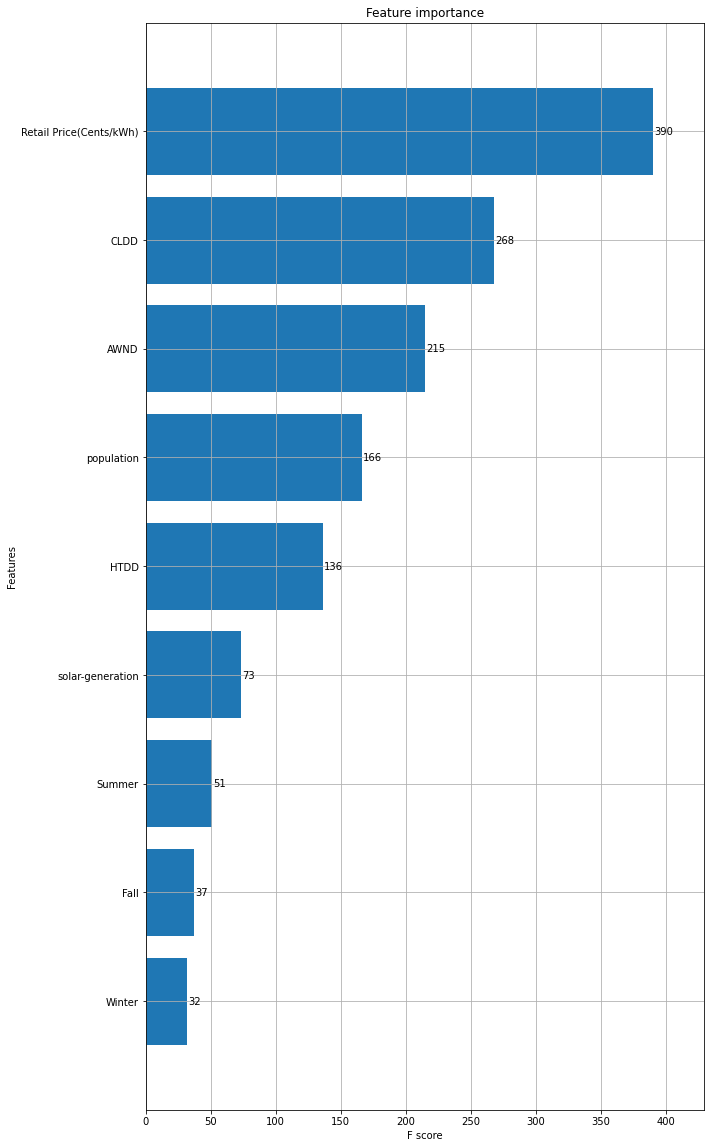

In [15]:
model = XGBRegressor(objective ='reg:squarederror')
model.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(10,20))
xgb.plot_importance(model, height=0.8, ax=ax)

In [16]:
def sm_regression(X_train,y_train,X_test,y_test):
    X_train = sm.add_constant(X_train)
    X_test = sm.add_constant(X_test)

    model = sm.OLS(y_train,X_train)
    results = model.fit()
    results.params
    print(results.summary())
    predictions = results.predict(X_test)
    df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
    
    return df_pred

In [17]:
sm_regression(X_train, y_train, X_test, y_test)

                            OLS Regression Results                            
Dep. Variable:                   mkwh   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     85.47
Date:                Mon, 20 Jul 2020   Prob (F-statistic):           4.48e-26
Time:                        12:31:11   Log-Likelihood:                -346.40
No. Observations:                  57   AIC:                             712.8
Df Residuals:                      47   BIC:                             733.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    3

,Actual,Predicted
68,4670,4581.057341
37,3352,3684.590373
15,3672,3583.595160
7,4498,4372.927729
5,4293,4396.600708
48,4036,3892.432239
1,3452,3721.601606
69,4178,3915.086003
45,3972,3932.783635
23,3789,3693.989878


Mean Absolute Error: 132.01828160005192
Mean Squared Error: 25005.032319111375
Root Mean Squared Error: 158.12979579798164


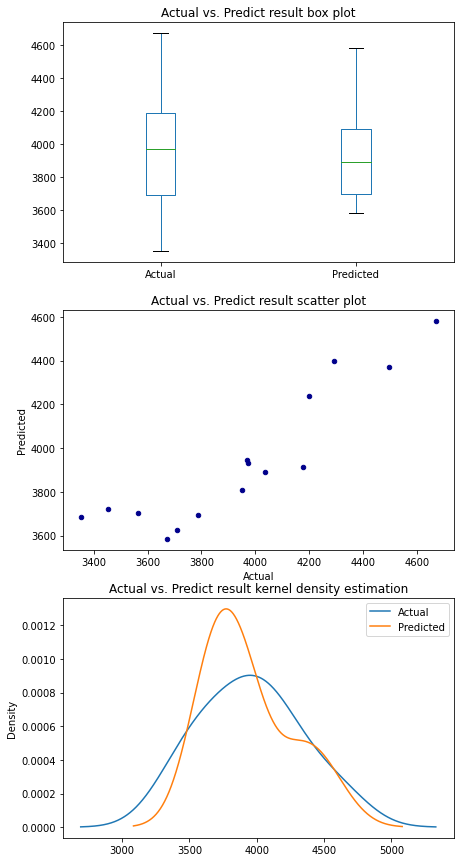

In [18]:
com_lr = LinearRegression()
com_lr.fit(X_train, y_train)
com_predictions = com_lr.predict(X_test)
evaluate_performances(y_test, com_predictions)
com_df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': com_predictions})
visualize_graph(com_df_pred)

In [35]:
def cal_vif(df):
    features= df[['Retail Price(Cents/kWh)', 'CLDD', 'AWND', 'TAVG', 'area', 'HTDD', 'population']]
    X = add_constant(features)
    vif=pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)
    
    return vif

In [36]:
cal_vif(df_commercial_train)

Retail Price(Cents/kWh)        1.275370
CLDD                         111.581829
AWND                           1.600985
TAVG                         839.574851
area                       24470.154837
HTDD                         402.342286
population                     1.190347
dtype: float64

In [21]:
a  = com_lr.intercept_#截距
b = com_lr.coef_#回归系数
print("最佳拟合线:截距",a,",回归系数：",b)

最佳拟合线:截距 3414.5878707821357 ,回归系数： [ -21.38388136  134.43755442   93.18952229 -212.3245448  1569.41791293
  -65.65377419  388.79088583  193.03073587   82.98080491]


In [22]:
# Visualization
def visualization(y_pred):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(30,20))
    fig.suptitle('Predicted and Actual plot')
    ax1.plot(range(len(y_pred)),y_pred,'b',label="predict")
    ax1.legend(loc="upper right")
    ax2.plot(range(len(y_pred)),y_pred,'r',label="actual")
    ax2.legend(loc="upper right")
    ax3.plot(range(len(y_pred)),y_pred,'b',label="predict")
    ax3.plot(range(len(y_pred)),y_test,'r',label="test")
    ax3.legend(loc="upper right")
    plt.show()

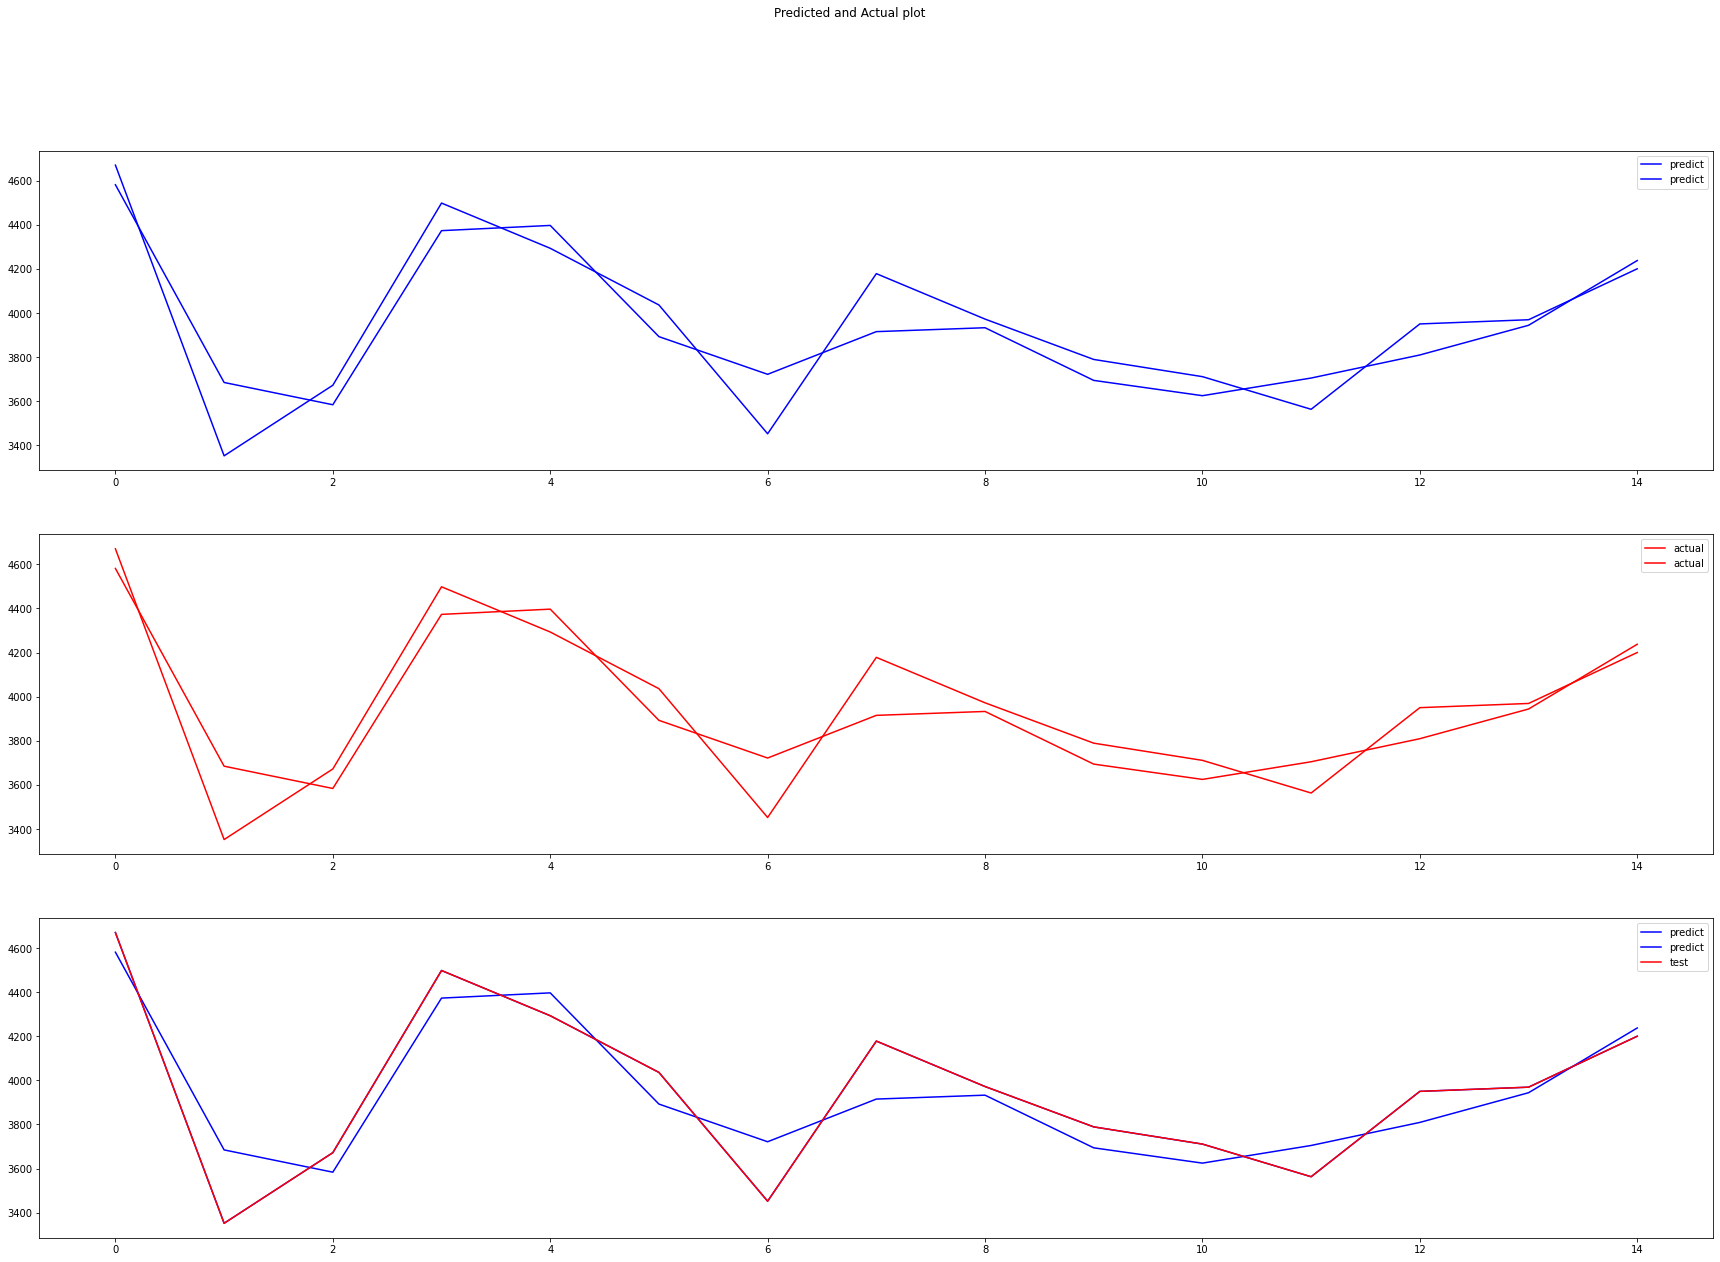

In [23]:
visualization(com_df_pred)